In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix

In [11]:
filepath = r"d:\User\Desktop\GT\jupyter\Diabetes\diabetes.csv"
columns = ['Pregnancies','Glucose','Blood Pressure','Skin thickness','Insulin','BMI','DPF(Diabetes Pedigree Function)','Age','Outcome']
data = pd.read_csv(filepath,names=columns,na_values='?')
data = data.iloc[1:]
data=data.dropna()
data

,Pregnancies,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,DPF(Diabetes Pedigree Function),Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [12]:
y=np.array(data.iloc[:,-1],dtype=float)
y=y[1:]

y

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [13]:
x=np.array(data.iloc[:,:-1],dtype=float)
x=x[1:]
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
x

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]], shape=(767, 8))

In [14]:
def logisregress(x,y,w,b,lr,iterations):
    m,n=x.shape
    cost=[]
    for i in range(iterations):
        z=np.dot(x,w)+b
        fx = 1/(1 + np.exp(-z))
        loss = -np.mean(y*np.log(fx) + (1-y)*np.log(1-fx))
        dw = np.dot(x.T,(fx-y))/m
        db = np.mean(fx-y)
        w = w - lr*dw
        b = b - lr*db
        cos = cost_calc(x,y,w,b,fx)
        cost.append(cos)
    fx = (fx>=0.5).astype(int)
    return w,b,cost,fx

In [15]:
def cost_calc(x,y,w,b,fx):
    cost = -np.mean(y*np.log(fx) + (1-y)*np.log(1-fx))
    return cost

Weight calculated: [ 0.36993032  1.01826411 -0.21297208 -0.00970368 -0.07619578  0.64255303
  0.29247783  0.19907406]
Bias calculated: -0.8224092073610888


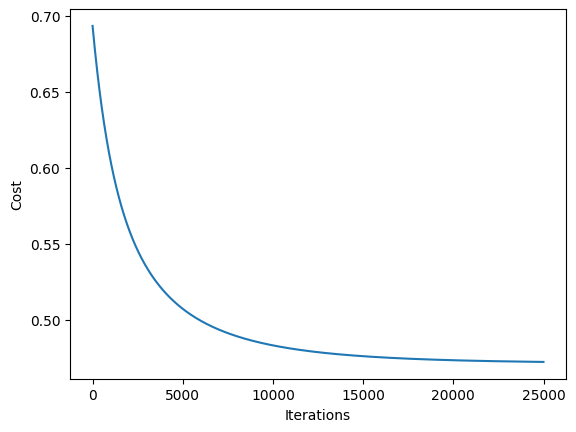

Accuracy: 0.7809647979139505
Precision: 0.7368421052631579
Recall: 0.5767790262172284
F1 Score: 0.6470588235294118


In [27]:
def main():
    lr = 0.001
    iterations = 25000
    w = np.zeros(x.shape[1])
    b=0
    w,b,cost,y_pred = logisregress(x,y,w,b,lr,iterations)

    print(f"Weight calculated: {w}")
    print(f"Bias calculated: {b}")

    plt.plot(range(iterations),cost)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    print("F1 Score:", f1_score(y, y_pred))
    
main()

# Using Scikit Learn


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8116883116883117
Precision: 0.7916666666666666
Recall: 0.6666666666666666
F1 Score: 0.7238095238095238
Confusion Matrix:
 [[87 10]
 [19 38]]


In [21]:
print("Weights: ", model.coef_) 
print("Bias: ", model.intercept_) 

Weights:  [[ 0.36872827  1.08592142 -0.1396258   0.00347923 -0.04683199  0.63931347
   0.29049265  0.19648053]]
Bias:  [-0.86749898]
